In [4]:

###############################################################################
###############################################################################
#***************DATA PREPARATION AND CLEANING**********************************
###############################################################################
###############################################################################

import os
import pandas as pd
import numpy as np



df = pd.read_excel('2010to2018.xlsx')

#print the column names
print (df.columns)
df.head()
df.tail()
df.isna()
#delete columns NA or invalid data (since there are few)
df=df.dropna(how='all', axis=1)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')


In [8]:
#new columns names
dffinal = df.rename(columns={'Unnamed: 0': 'Date', 'Unnamed: 1': 'flightN','Unnamed: 3': 'AircraftType','Unnamed: 4': 'AircraftReg','Unnamed: 5':'OperationType','Unnamed: 6':'Departure' })
dffinal = dffinal.rename(columns={'Unnamed: 7': 'Arrival', 'Unnamed: 8': 'EstimTD','Unnamed: 9': 'ActualTD','Unnamed: 10': 'EstimTA','Unnamed: 11':'ActualTA','Unnamed: 12':'DepartDiff' })
dffinal = dffinal.rename(columns={'Unnamed: 13': 'ArrivalDiff', 'Unnamed: 15': 'AirbornH','Unnamed: 16': 'BlockH','Unnamed: 17': 'Passengers','Flight Statistics Report': 'Arrival'})

#Detect missing values in an Index and nulls
dffinal.isna().sum()
dffinal.isnull().sum()

# dropping NA value observations 
dffinal = dffinal.dropna(how='any',axis=0)

#delete column names by default on
dffinal=dffinal.drop(df.index[6], inplace=False)

#split and convertion to datetime Date
dffinal['Date'] = pd.to_datetime(dffinal['Date'], format='%d%b%y', utc=True)
dffinal['Year'] = pd.DatetimeIndex(dffinal['Date']).year
dffinal['Month'] = pd.DatetimeIndex(dffinal['Date']).month
dffinal['Day'] = pd.DatetimeIndex(dffinal['Date']).day
dffinal['Weekday'] = dffinal['Date'].dt.day_name
dffinal['Weekday_num'] = dffinal['Date'].dt.dayofweek


#split STD
dffinal['HEstimTD'] = pd.DatetimeIndex(dffinal['EstimTD']).hour
dffinal['mtsEstimTD'] = pd.DatetimeIndex(dffinal['EstimTD']).minute

#split ATD
dffinal['HActualTD'] = pd.DatetimeIndex(dffinal['ActualTD']).hour
dffinal['mtsActualTD'] = pd.DatetimeIndex(dffinal['ActualTD']).minute

#split STA
dffinal['EstimTA'] = dffinal['EstimTA'].str.replace('24:','00:')
dffinal['HEstimTA'] = pd.DatetimeIndex(dffinal['EstimTA']).hour
dffinal['mtsEstimTA'] = pd.DatetimeIndex(dffinal['EstimTA']).minute

#split ATA
dffinal['ActualTA'] = dffinal['ActualTA'].str.replace('24:','00:')
#dffinal['ActualTA'] = pd.to_datetime(dffinal['ActualTA'], format='%H:%m', utc=True)
dffinal['HActualTA'] = pd.DatetimeIndex(dffinal['ActualTA']).hour
dffinal['mtsActualTA'] = pd.DatetimeIndex(dffinal['ActualTA']).minute

dffinal.head()

#sort date
dffinal=dffinal.sort_values(by=['Date'])

#evaluation of negative of positive sign in string DepartDiff
dffinal['stateflightDepartDiff']=dffinal['DepartDiff'].str.contains('-')
#remane true and false per Early or delayed flight
dffinal['stateflightDepartDiff']= np.where (dffinal['stateflightDepartDiff'], 'Early', 'Delayed')
#split minutes and hours DepartDiff
dffinal['HDepartDiff'],dffinal['mtsDepartDiff']= dffinal['DepartDiff'].str.split(":", n = 1).str
#convertion to numeric
dffinal['HDepartDiff']= pd.to_numeric(dffinal['HDepartDiff'], errors='raise', downcast=None)
dffinal['mtsDepartDiff']= pd.to_numeric(dffinal['mtsDepartDiff'], errors='raise', downcast=None)
dffinal['Passengers']= pd.to_numeric(dffinal['Passengers'], errors='raise', downcast=None)
#convertion to minutes
dffinal.loc[:,'HDepartDiff'] *= 60
#sum mts
dffinal['mtstotaisDepartDiff']=dffinal['HDepartDiff']+dffinal['mtsDepartDiff']

dffinal['mtstotaisDepartDiff']=dffinal['mtstotaisDepartDiff'].abs()
#evaluation of negative of positive sign in string ArrivalDiff
dffinal['stateflightArrivalDiff']=dffinal['ArrivalDiff'].str.contains('-')
#remane true and false per Early or delayed flight
dffinal['stateflightArrivalDiff']= np.where (dffinal['stateflightArrivalDiff'], 'Early', 'Delayed')
#split minutes and hours ArrivalDiff
dffinal['HArrivalDiff'],dffinal['mtsArrivalDiff']= dffinal['ArrivalDiff'].str.split(":", n = 1).str
#convertion to numeric
dffinal['HArrivalDiff']= pd.to_numeric(dffinal['HArrivalDiff'], errors='raise', downcast=None)
dffinal['mtsArrivalDiff']= pd.to_numeric(dffinal['mtsArrivalDiff'], errors='raise', downcast=None)
#convertion to minutes
dffinal.loc[:,'HArrivalDiff'] *= 60
#sum mts
dffinal['mtstotaisArrivalDiff']=dffinal['HArrivalDiff']+dffinal['mtsArrivalDiff']
dffinal['mtstotaisArrivalDiff']=dffinal['mtstotaisArrivalDiff'].abs()

#Airborn
dffinal['HAirborn'],dffinal['mtsAirborn']= dffinal['AirbornH'].str.split(":", n = 1).str
dffinal['HAirborn']= pd.to_numeric(dffinal['HAirborn'], errors='raise', downcast=None)
dffinal['mtsAirborn']= pd.to_numeric(dffinal['mtsAirborn'], errors='raise', downcast=None)
dffinal.loc[:,'HAirborn'] *= 60
dffinal['mtstotaisAirborn']=dffinal['HAirborn']+dffinal['mtsAirborn']


# Blockhours
dffinal['HBlockH'],dffinal['mtsBlockH']= dffinal['BlockH'].str.split(":", n = 1).str
dffinal['HBlockH']= pd.to_numeric(dffinal['HBlockH'], errors='raise', downcast=None)
dffinal['mtsBlockH']= pd.to_numeric(dffinal['mtsBlockH'], errors='raise', downcast=None)
dffinal.loc[:,'HBlockH'] *= 60
dffinal['mtstotaisBlockH']=dffinal['HBlockH']+dffinal['mtsBlockH']

dffinal['CorrectOperationType']=dffinal['OperationType'].str.replace('T', 'Test').replace('C', 'Charter').replace('J', 'ACMI').replace('K', 'Train').replace('N', 'Private').replace('G', 'ACMI').replace('W', 'ACMI').replace('P', 'Position')


dffinal['Airline'] = 0
dffinal['Airline'] = dffinal.flightN.str.extract(r'(\w+?)(\d+)', expand=True)

#Anonymization

dffinal['Airline_anon'] = dffinal['Airline'].astype('category').cat.codes


C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: FutureWarning: Columnar iteration over characters will be deprecated in future releases.


                             Date flightN AircraftType AircraftReg  \
count                       35929   35929        35929       35929   
unique                       3276    6674            9          29   
top     2014-10-11 00:00:00+00:00   W3101          343       CSTFZ   
freq                           32    1263        10817        3817   
first   2010-01-01 00:00:00+00:00     NaN          NaN         NaN   
last    2018-12-31 00:00:00+00:00     NaN          NaN         NaN   
mean                          NaN     NaN          NaN         NaN   
std                           NaN     NaN          NaN         NaN   
min                           NaN     NaN          NaN         NaN   
25%                           NaN     NaN          NaN         NaN   
50%                           NaN     NaN          NaN         NaN   
75%                           NaN     NaN          NaN         NaN   
max                           NaN     NaN          NaN         NaN   

       OperationTyp

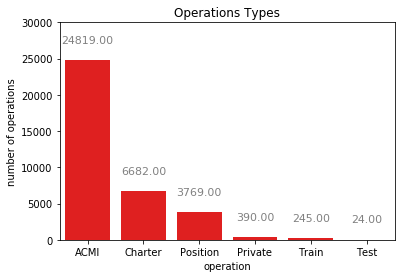

In [9]:

###############################################################################
###############################################################################
#********Exploratory Data Analysis*********************************************
###############################################################################
###############################################################################
import matplotlib.pyplot as plt
import seaborn as sns
#count/sandard deviation,mean,min, max, percentiles per categories
statsorig = dffinal.describe(include='all')
print(statsorig)
# revelate the most important categorical 

#bar chart Type of Operation
count_operation = dffinal["CorrectOperationType"].value_counts()

x_axis=count_operation.index
y_axis=dffinal["CorrectOperationType"].value_counts()

g=sns.barplot(x_axis, y_axis, color="red")
ax=g
plt.title('Operations Types')
plt.xlabel('operation')
plt.ylabel('number of operations')
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,30000)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0E6404388>,
      dtype=object)

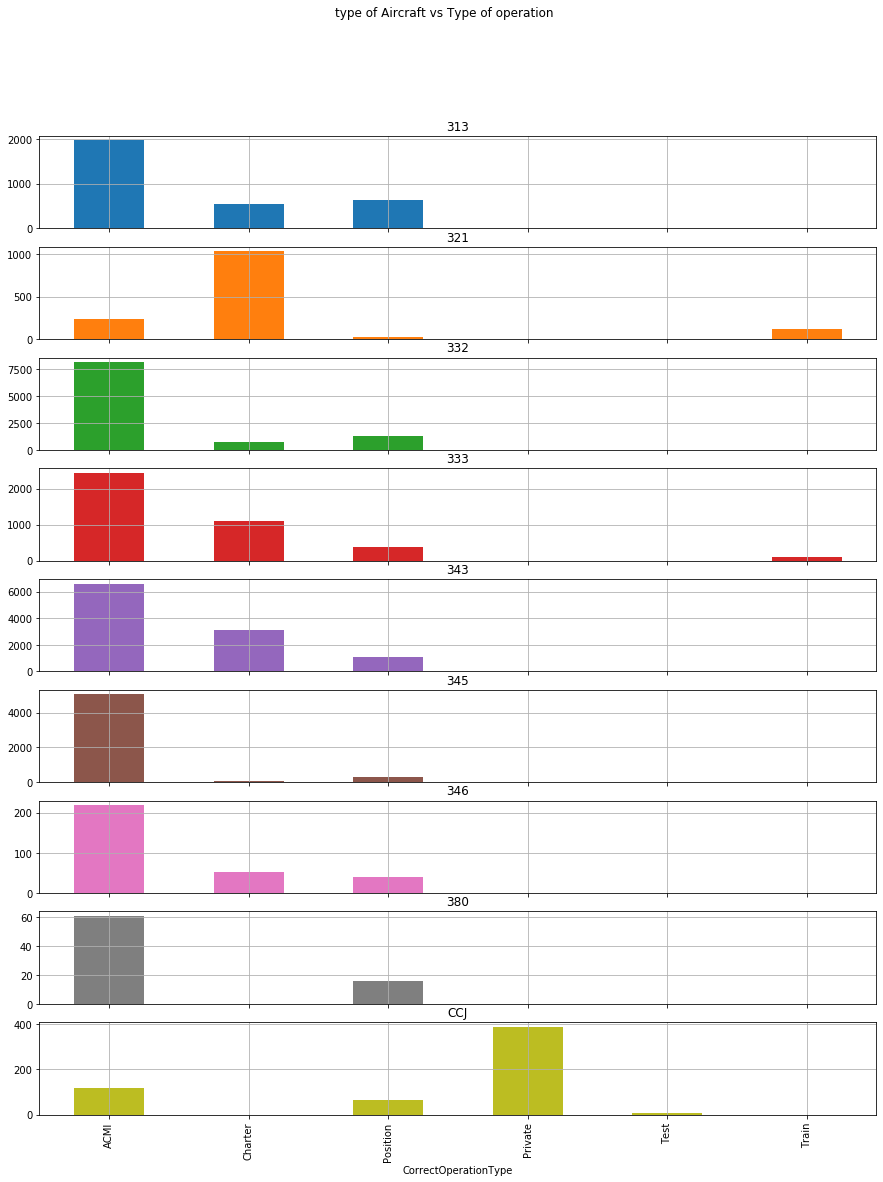

In [10]:
# Subplot with type of Aircraft vs type of operation
dfsubplot = dffinal.groupby(['CorrectOperationType','AircraftType']).size().unstack(fill_value=0)
dfsubplot.plot.bar(subplots=True,title='type of Aircraft vs Type of operation',figsize=(15, 18),sharex=True,grid=True,legend= False)



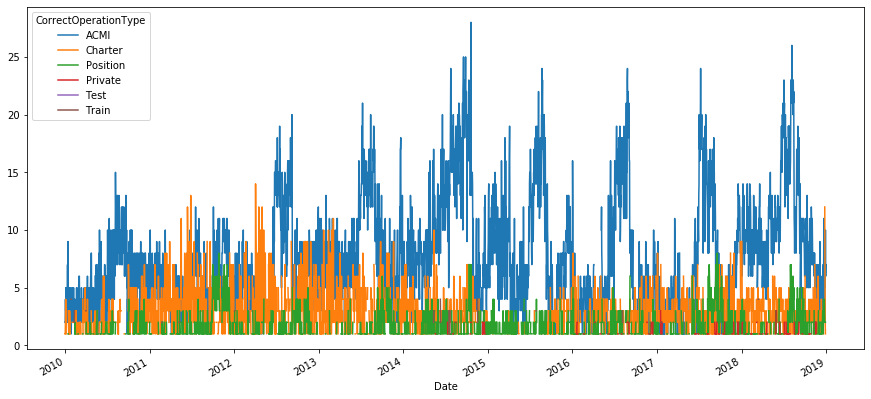

In [11]:
#plot between type of operation and type of aircraft per date
#plot data
fig, ax = plt.subplots(figsize=(15,7))
dffinal.groupby(['Date','CorrectOperationType']).count()['AircraftType'].unstack().plot(ax=ax)
